In [35]:
##### 화자인식 일반 머신러닝 코드 #####
import librosa
import librosa.display
# import pyaudio #마이크를 사용하기 위한 라이브러리
import wave
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression#텐서플로우로 바꿀예정
import os
from google.colab import drive

from imblearn.over_sampling import *
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!pwd

/content/drive/My Drive/Colab Notebooks


In [6]:
%cd drive/MyDrive/Colab\ Notebooks/

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/test_sound_data'
/content/drive/MyDrive/Colab Notebooks


In [20]:
!ls

 연습		    feedforward_neural_network	 sound_data   test_sound_data
'딥러닝 홀로서기'   GCNN_Example		 T-academy


In [21]:
##### 변수 설정 부분 #####
# FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 #비트레이트 설정
CHUNK = int(RATE / 10) # 버퍼 사이즈 1초당 44100비트레이트 이므로 100ms단위
RECORD_SECONDS = 1 #녹음할 시간 설정
WAVE_OUTPUT_FILENAME = "output.wav"
DATA_PATH = "./sound_data/"
train_data=[]#train_date 저장할 공강
train_label=[]#train_label 저장할 
test_data=[]#train_date 저장할 공강
test_label=[]#train_label 저장할 
##########################



최 = []
유 = []
경 = []
인나 = []
최_label = []
유_label = []
경_label = []
인나_label = []

In [22]:
def load_wave_generator(path): 
       
    batch_waves = []
    labels = []
    # input_width=CHUNK*6 # wow, big!!
    folders = os.listdir(path)
    # folders = path
    #while True:
       # print("loaded batch of %d files" % len(files))
    for folder in folders:
        if not os.path.isdir(path):continue               #폴더가 아니면 continue                   
        files = os.listdir(path+"/"+folder)        
        print("Foldername :",folder,", - file count : ",len(files))         #폴더 이름과 그 폴더에 속하는 파일 갯수 출력
        if(folder == "0"):
            for wav in files:
                if not wav.endswith(".wav"):continue
                else:
                    global 최,최_label            #전역변수를 사용하겠다.
                    print("Filename :",wav)          #.wav 파일이 아니면 continue
                    y, sr = librosa.load(path+"/"+folder+"/"+wav)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=45, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T


                    if(len(최)==0):
                        최 = mfcc
                        최_label = np.full(len(mfcc), int(folder))
                    else:
                        최 = np.concatenate((최, mfcc), axis = 0)
                        최_label = np.concatenate((최_label, np.full(len(mfcc),  int(folder))), axis = 0)
                        #print("mfcc :",mfcc.shape)
        if(folder == "1"):
            for wav in files:
                if not wav.endswith(".wav"):continue
                else:
                    global 유,유_label
                    print("Filename :",wav)
                    y, sr = librosa.load(path+"/"+folder+"/"+wav)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=45, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T


                    if(len(유)==0):
                        유 = mfcc
                        유_label = np.full(len(mfcc), int(folder))
                    else:
                        유 = np.concatenate((유, mfcc), axis = 0)
                        유_label = np.concatenate((유_label, np.full(len(mfcc),  int(folder))), axis = 0)
                        #print("mfcc :",mfcc.shape)
        if(folder == "2"):
            for wav in files:
                if not wav.endswith(".wav"):continue
                else:
                    global 경, 경_label#전역변수를 사용하겠다.
                    print("Filename :",wav)#.wav 파일이 아니면 continue
                    y, sr = librosa.load(path+"/"+folder+"/"+wav)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=45, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T


                    if(len(경)==0):
                        경 = mfcc
                        경_label = np.full(len(mfcc), int(folder))
                    else:
                        경 = np.concatenate((경, mfcc), axis = 0)
                        경_label = np.concatenate((경_label, np.full(len(mfcc),  int(folder))), axis = 0)
                        #print("mfcc :",mfcc.shape)
        if(folder == "3"):
            for wav in files:
                if not wav.endswith(".wav"):continue
                else:
                    global 인나, 인나_label#전역변수를 사용하겠다.
                    print("Filename :",wav)#.wav 파일이 아니면 continue
                    y, sr = librosa.load(path+"/"+folder+"/"+wav)
                    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=45, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T


                    if(len(인나)==0):
                        인나 = mfcc
                        인나_label = np.full(len(mfcc), int(folder))
                    else:
                        인나 = np.concatenate((인나, mfcc), axis = 0)
                        인나_label = np.concatenate((인나_label, np.full(len(mfcc),  int(folder))), axis = 0)
                        #print("mfcc :",mfcc.shape)

In [23]:
load_wave_generator(DATA_PATH)

Foldername : 0 , - file count :  22
Filename : 8.wav
Filename : 4.wav
Filename : 1.wav
Filename : 6.wav
Filename : 3.wav
Filename : 2.wav
Filename : 7.wav
Filename : 5.wav
Filename : 9.wav
Filename : 20.wav
Filename : 15.wav
Filename : 11.wav
Filename : 12.wav
Filename : 17.wav
Filename : 19.wav
Filename : 16.wav
Filename : 18.wav
Filename : 10.wav
Filename : 13.wav
Filename : 14.wav
Filename : 최_2분.wav
Filename : 최.wav
Foldername : 1 , - file count :  22
Filename : Ryu13.wav
Filename : Ryu4.wav
Filename : Ryu16.wav
Filename : Ryu11.wav
Filename : Ryu17.wav
Filename : Ryu12.wav
Filename : Ryu8.wav
Filename : Ryu2.wav
Filename : Ryu19.wav
Filename : Ryu7.wav
Filename : Ryu14.wav
Filename : Ryu9.wav
Filename : Ryu1.wav
Filename : Ryu6.wav
Filename : Ryu20.wav
Filename : Ryu3.wav
Filename : Ryu15.wav
Filename : Ryu18.wav
Filename : Ryu5.wav
Filename : Ryu10.wav
Filename : 2min_ryu.wav
Filename : 유.wav
Foldername : 2 , - file count :  22
Filename : 경재원5.wav
Filename : 경재원4.w

In [ ]:
# 유인나 목소리 추가!?



In [26]:
#  0 인값 (아마 소리 없을때) 제거

choi_update = []
choi_update_label = []

yu_update = []
yu_update_label = []

jyeong_update = []
jyeong_update_label = []

inna_update = []
inna_update_label = []

for i in range(len(최)):
    if 최[i][1] != 0:
        choi_update.append(최[i])
        choi_update_label.append(최_label[i])
for i in range(len(유)):
    if 유[i][1] != 0:
        yu_update.append(유[i])
        yu_update_label.append(유_label[i])
for i in range(len(경)):
    if 경[i][1] != 0:
        jyeong_update.append(경[i])
        jyeong_update_label.append(경_label[i])
for i in range(len(인나)):
    if 인나[i][1] != 0:
        inna_update.append(인나[i])
        inna_update_label.append(인나_label[i])

# 새 섹션

In [27]:
#  리스트를 배열로 바꿔줌
choi_update = np.array(choi_update)
yu_update = np.array(yu_update)
jyeong_update = np.array(jyeong_update)
inna_update = np.array(inna_update)
choi_update_label = np.array(choi_update_label)
yu_update_label = np.array(yu_update_label)
jyeong_update_label = np.array(jyeong_update_label)
inna_update_label = np.array(inna_update_label)



In [28]:
jyeong_update.shape

(35150, 45)

In [29]:
yu_update.shape

(32091, 45)

In [30]:
choi_update.shape

(30992, 45)

In [31]:
inna_update.shape

(1004, 45)

In [33]:

a_x, a_y = [], []
a_x = np.concatenate((inna_update, jyeong_update), axis=0)
a_y = np.concatenate((inna_update_label, jyeong_update_label), axis=0)
print(a_y.shape)

(36154,)


In [36]:
X_s, y_s = SMOTE().fit_resample(a_x, a_y)
X_s = X_s[36154:]
y_s = y_s[36154:]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
print(X_s.shape)
print(y_s.shape)

(34146, 45)
(34146,)


In [38]:
def make_data(data, data_label):
    a = []
    b = []
    for j, row in enumerate(data):
        if(j+100 == len(data)):
            a = np.array(a)
            b = np.array(b)
            return a,b
        a.append(data[j:j+100])
        b.append(data_label[j+100])       
    


In [39]:
c, cc = make_data(choi_update, choi_update_label)
y, yy = make_data(yu_update, yu_update_label)
j, jj = make_data(jyeong_update, jyeong_update_label)
i, ii = make_data(X_s, y_s)

In [40]:
c.shape

(30892, 100, 45)

In [41]:
i.shape

(34046, 100, 45)

In [42]:
temp = np.concatenate((c, y), axis = 0)
temp = np.concatenate((temp, j), axis = 0)
temp = np.concatenate((temp, i), axis = 0)

temp2 = np.concatenate((cc, yy), axis = 0)
temp2 = np.concatenate((temp2, jj), axis = 0)
temp2 = np.concatenate((temp2, ii), axis =0)


In [43]:
print(temp.shape)
print(temp2.shape)

(131979, 100, 45)
(131979,)


In [44]:
tmp = [[x,y] for x, y in zip(temp, temp2)]


In [45]:
import random
random.shuffle(tmp)


In [46]:
x_train = [n[0] for n in tmp]
y_train = [n[1] for n in tmp]

In [47]:
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)
y_train[:10]

(131979, 100, 45)


array([1, 2, 2, 3, 0, 1, 2, 0, 2, 0])

In [48]:
train = x_train[:90000]
train_label = y_train[:90000]

val = x_train[90000:]
val_label = y_train[90000:]

In [52]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


model = Sequential()
model.add(layers.GRU(128, input_shape=(100, 45)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [53]:
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer='rmsprop',
              metrics=['sparse_categorical_accuracy'])

In [54]:
import time
start = time.time()

history = model.fit(train, train_label,
           epochs=2, shuffle=False,
           validation_data=(val, val_label))


print("학습 시간 : ",time.time()-start)

Epoch 1/2
2813/2813 [==============================] - 248s 87ms/step - loss: 0.1060 - sparse_categorical_accuracy: 0.9608 - val_loss: 0.0013 - val_sparse_categorical_accuracy: 0.9997
Epoch 2/2
2813/2813 [==============================] - 246s 87ms/step - loss: 0.0022 - sparse_categorical_accuracy: 0.9992 - val_loss: 4.6190e-04 - val_sparse_categorical_accuracy: 0.9999
학습 시간 :  493.73553681373596


NameError: ignored

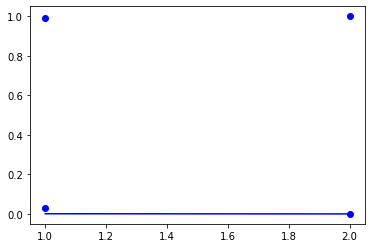

In [55]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['sparse_categorical_accuracy']
# val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, accuracy, 'bo', label='accuracy')
plt.plot(epochs, val_accuracy, 'b', label='val_accuracy')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


In [57]:
from keras.models import load_model

model.save('gru_6-3(100%).h5')

In [58]:
!pwd

/content/drive/My Drive/Colab Notebooks


In [ ]:
from keras.models import load_model

model2 = load_model('gru_4-25(100%).h5')


In [ ]:
def who(y_pred):
  aaa = 0
  bbb = 0
  ccc = 0
  for i in range(0, len(y_pred)):
    if(y_pred[i] == 0):
      aaa = aaa + 1
    elif(y_pred[i] == 1):
      bbb = bbb + 1
    else:
      ccc = ccc + 1

  result = [aaa,bbb,ccc]
  return result.index(max(result)), result

In [59]:
def who2(y_pred):
  aaa = 0
  bbb = 0
  ccc = 0
  ddd = 0
  for i in range(0, len(y_pred)):
    if(y_pred[i] == 0):
      aaa = aaa + 1
    elif(y_pred[i] == 1):
      bbb = bbb + 1
    elif(y_pred[i] == 3):
      ddd = ddd + 1
    else:
      ccc = ccc + 1

  result = [aaa,bbb,ccc, ddd]
  return result.index(max(result)), result

In [60]:
def test_voice(wav, model):

  y, sr = librosa.load(wav)
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=45, hop_length=int(sr*0.01),n_fft=int(sr*0.02)).T

  
  mfcc_update=[]
  for i in range(len(mfcc)):
    if mfcc[i][1] != 0:
        mfcc_update.append(mfcc[i])

  temp_label = np.full(len(mfcc_update), 0)
  test, test_label = make_data(mfcc_update, temp_label)

  y_pred = np.argmax(model.predict(test), axis=-1)

  return who2(y_pred)

In [66]:
path = "test_sound_data/test_data"

folders = os.listdir(path)
folders

['0', '1', '2', '3']

In [64]:
def result(path, model):
  total = 0
  count = 0
  folders = os.listdir(path)

  for folder in folders:
      if not os.path.isdir(path):continue #폴더가 아니면 continue                   
      files = os.listdir(path+"/"+folder)        
      print("Foldername :",folder,", - file count : ",len(files))#폴더 이름과 그 폴더에 속하는 파일 갯수 출력
      total = total + len(files)
      for wav in files:
        print(wav)
        if not wav.endswith(".wav"):continue
        else:
          wav = path+"/"+folder+"/"+wav
          result_index, result = test_voice(wav, model)
          print("result : ", result_index , " real : ", int(folder), "  count : ", result)
          if(result_index == int(folder)):
            count = count + 1

  return str(count/total) + "%"

In [67]:
result(path, model)

Foldername : 0 , - file count :  9
savevoice (1).wav
result :  0  real :  0   count :  [803, 0, 0, 0]
savevoice.wav
result :  0  real :  0   count :  [169, 0, 0, 0]
choi1.wav
result :  0  real :  0   count :  [312, 0, 0, 0]
choi2.wav
result :  0  real :  0   count :  [335, 0, 0, 0]
choi3.wav
result :  0  real :  0   count :  [275, 0, 0, 0]
choi4.wav
result :  0  real :  0   count :  [261, 6, 0, 0]
choi5.wav
result :  0  real :  0   count :  [331, 1, 3, 0]
최_test.wav
result :  0  real :  0   count :  [343, 0, 0, 0]
최_test2.wav
result :  0  real :  0   count :  [229, 1, 31, 0]
Foldername : 1 , - file count :  9
savevoice.wav
result :  1  real :  1   count :  [0, 755, 146, 0]
output (1).wav
result :  1  real :  1   count :  [10, 891, 0, 0]
output.wav
result :  1  real :  1   count :  [6, 395, 0, 0]
test2.wav
result :  1  real :  1   count :  [2, 399, 0, 0]
test4.wav
result :  1  real :  1   count :  [0, 401, 0, 0]
test5.wav
result :  1  real :  1   count :  [0, 401, 0, 0]
test1.wav
resu

'1.0%'

In [ ]:
test_voice("test_sound_data/2/sample_kyung.wav", model)

(2, [0, 0, 901])